# Active learning for e-commerce

## Loading libraries

In [1]:
# env: AL
import random
import matplotlib.pyplot as plt

# Part 1

In [2]:
# Example product data and ad placements
products = ['product1', 'product2', 'product3', 'product4']
ad_placements = ['top', 'bottom', 'sidebar']

def generate_random_layout():
    return {
        'product_order': random.sample(products, len(products)),
        'ad_placement': random.choice(ad_placements)
    }

number_of_bees = 10
swarm = [generate_random_layout() for _ in range(number_of_bees)]

In [3]:
def calculate_engagement_time(layout):
    # Mock function, replace with actual data fetching
    return random.uniform(1, 10)  # Example: return random engagement time

def calculate_ctr(layout):
    # Mock function, replace with actual data fetching
    return random.uniform(1, 10)  # Example: return random CTR

def calculate_add_to_cart_rate(layout):
    # Mock function, replace with actual data fetching
    return random.uniform(1, 10)  # Example: return random add-to-cart rate

def calculate_checkout_completion_rate(layout):
    # Mock function, replace with actual data fetching
    return random.uniform(1, 10)  # Example: return random completion rate

def calculate_email_open_rate(email_content):
    # Mock function, replace with actual data fetching
    return random.uniform(1, 10)  # Example: return random open rate

def calculate_conversion_rate(email_content):
    # Mock function, replace with actual data fetching
    return random.uniform(1, 10)  # Example: return random conversion rate

def update_layout_based_on_best(best_layout):
    new_layout = best_layout.copy()
    random.shuffle(new_layout['product_order'])
    new_layout['ad_placement'] = random.choice(ad_placements)
    return new_layout


In [4]:
max_iterations = 20

for iteration in range(max_iterations):
    fitness_scores = [calculate_engagement_time(bee) for bee in swarm]
    best_layout = swarm[fitness_scores.index(max(fitness_scores))]
   
    for i in range(number_of_bees):
        swarm[i] = update_layout_based_on_best(best_layout)
   
    swarm[random.randint(0, number_of_bees-1)] = generate_random_layout()

optimal_layout = best_layout
print("Optimal Layout:", optimal_layout)

Optimal Layout: {'product_order': ['product1', 'product4', 'product2', 'product3'], 'ad_placement': 'sidebar'}


# Part 2

In [5]:
# Example product data and ad placements
products = ['product1', 'product2', 'product3', 'product4']
ad_placements = ['top', 'bottom', 'sidebar']

def generate_random_layout():
    return {
        'product_order': random.sample(products, len(products)),
        'ad_placement': random.choice(ad_placements)
    }

def calculate_combined_fitness(layout):
    # Mock fitness function, replace with actual data fetching
    engagement_time = random.uniform(1, 10)
    conversion_rate = random.uniform(1, 10)
    ctr = random.uniform(1, 10)
   
    combined_fitness = (0.4 * engagement_time) + (0.3 * conversion_rate) + (0.3 * ctr)
    return combined_fitness

def update_layout_based_on_best(best_layout):
    new_layout = best_layout.copy()
    random.shuffle(new_layout['product_order'])
    new_layout['ad_placement'] = random.choice(ad_placements)
    return new_layout


Optimal Layout: {'product_order': ['product1', 'product3', 'product4', 'product2'], 'ad_placement': 'top'}


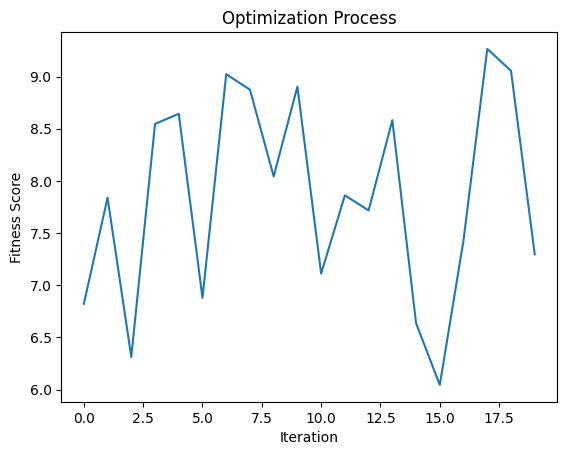

In [6]:
number_of_bees = 10
max_iterations = 20
swarm = [generate_random_layout() for _ in range(number_of_bees)]
fitness_scores_over_time = []

for iteration in range(max_iterations):
    fitness_scores = [calculate_combined_fitness(bee) for bee in swarm]
    best_layout = swarm[fitness_scores.index(max(fitness_scores))]
    best_fitness = max(fitness_scores)
    fitness_scores_over_time.append(best_fitness)
   
    for i in range(number_of_bees):
        swarm[i] = update_layout_based_on_best(best_layout)
   
    swarm[random.randint(0, number_of_bees-1)] = generate_random_layout()

optimal_layout = best_layout
print("Optimal Layout:", optimal_layout)

# Plot the fitness scores over iterations
plt.plot(fitness_scores_over_time)
plt.xlabel('Iteration')
plt.ylabel('Fitness Score')
plt.title('Optimization Process')
plt.show()

# Part 3

In [7]:
# Define the possible options for each layout element
cta_colors = ["red", "green", "blue"]
banner_positions = ["top", "middle", "sidebar"]
checkout_button_placements = ["top", "bottom", "sticky"]

In [8]:
# Define the bee algorithm parameters
num_bees = 10        # Total number of bees
num_generations = 5  # Number of iterations to optimize
num_best_layouts = 3  # Number of top layouts to keep and improve

# Define a function to create a random layout configuration
def generate_random_layout():
    return {
        "cta_color": random.choice(cta_colors),
        "banner_position": random.choice(banner_positions),
        "checkout_button_placement": random.choice(checkout_button_placements)
    }

# Define a function to calculate a "fitness score" for a layout
# In a real scenario, this could be based on actual user engagement metrics
def calculate_fitness(layout):
    # Random fitness score as a placeholder (in real-life, use conversion or click-through rates)
    return random.uniform(0, 1)

# Initialize a population of random layouts (initial bee configurations)
bees = [generate_random_layout() for _ in range(num_bees)]

In [9]:
# Start the optimization process
for generation in range(num_generations):
    print(f"\nGeneration {generation + 1}")

    # Calculate fitness for each layout and store it with the layout data
    fitness_scores = [(layout, calculate_fitness(layout)) for layout in bees]
   
    # Sort layouts by fitness score in descending order
    fitness_scores.sort(key=lambda x: x[1], reverse=True)
   
    # Keep the top layouts for the next generation (exploitation by worker bees)
    best_layouts = fitness_scores[:num_best_layouts]
   
    # Print best layouts of the current generation
    print("Best layouts:")
    for layout, score in best_layouts:
        print(f"Layout: {layout}, Fitness Score: {score:.2f}")
   
    # Generate new layouts for the next generation
    new_bees = []

    # Worker bees: Slightly modify the top layouts to refine them
    for layout, _ in best_layouts:
        modified_layout = layout.copy()
        modified_layout["cta_color"] = random.choice(cta_colors)
        new_bees.append(modified_layout)
   
    # Scout bees: Explore completely new layouts
    for _ in range(num_bees - len(new_bees)):
        new_bees.append(generate_random_layout())
   
    # Update the bee population for the next generation
    bees = new_bees

# Output the best layout found across all generations
best_layout = max(fitness_scores, key=lambda x: x[1])
print(f"\nOptimal layout found: {best_layout[0]} with Fitness Score: {best_layout[1]:.2f}")


Generation 1
Best layouts:
Layout: {'cta_color': 'red', 'banner_position': 'middle', 'checkout_button_placement': 'bottom'}, Fitness Score: 0.97
Layout: {'cta_color': 'blue', 'banner_position': 'sidebar', 'checkout_button_placement': 'sticky'}, Fitness Score: 0.87
Layout: {'cta_color': 'green', 'banner_position': 'top', 'checkout_button_placement': 'top'}, Fitness Score: 0.86

Generation 2
Best layouts:
Layout: {'cta_color': 'red', 'banner_position': 'sidebar', 'checkout_button_placement': 'sticky'}, Fitness Score: 0.55
Layout: {'cta_color': 'blue', 'banner_position': 'sidebar', 'checkout_button_placement': 'top'}, Fitness Score: 0.53
Layout: {'cta_color': 'green', 'banner_position': 'sidebar', 'checkout_button_placement': 'sticky'}, Fitness Score: 0.32

Generation 3
Best layouts:
Layout: {'cta_color': 'red', 'banner_position': 'sidebar', 'checkout_button_placement': 'sticky'}, Fitness Score: 0.97
Layout: {'cta_color': 'blue', 'banner_position': 'sidebar', 'checkout_button_placement':